# Como anda o tempo médio de execução da sua equipe?
    Até o momento, dia 22/12/2023, eu trabalho no Departamento municipal de água e esgoto (DMAE) e me pediram uma forma de estudar a performance das equipes de água, esgoto e drenagem com a ideia de que o usuário (gerente do setor) podesse analisar semanalmente a produção da sua equipe.
    A partir do exposto, adquiri os dados e comecei os estudos necessários.

## Variaveis utilizadas para o estudo

In [1]:
variavel_limite_inferior_tipo_servico = 100
entrada_dados = r'\\172.22.1.45\c$\Analise de dados\tempo_medio\ft_tge.csv'
destino_final = r'\\172.22.1.45\c$\Projetos\SIMA\Equipes\tempo_medio_tratado.xlsx'

## Importando dados

In [2]:
import pandas as pd
import seaborn as sns                     
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

In [3]:
df = pd.read_csv(entrada_dados, low_memory=False)

## Verificando os tipos dos dados

In [4]:
df.dtypes

dt_inicio_desloc       object
dt_fim_desloc          object
dt_solicitacao         object
dt_ano                  int64
nm_logradouro          object
tp_logradouro          object
nr_imovel_lograd      float64
nm_bairro_cidade       object
dt_execucao_serv       object
hr_padrao               int64
dt_inicio_des_real     object
dt_final_des_real      object
dt_inicio_ocorrenc     object
dt_final_ocorrenc      object
gasto                 float64
gasto1                float64
gasto2                float64
data_exec              object
nr_requis_ord_serv      int64
nr_ordem_servico        int64
cd_equipe             float64
cd_logradouro           int64
cd_bairro               int64
cd_servico              int64
dtype: object

##  Apagando colunas desnecessárias
Algumas colunas serão apagadas do estudo mesmo fazendo sentido para o projeto em questão, uma vez que os servidores não possuiam o habito em alimenta-las de forma correta. 
Baseando-se na forma como eles alimentavam os dados, por meio de reuniões e comentários, serão abordados apenas dados alimentados com maior zelo por parte dos servidores.


In [5]:
df = df.drop(['dt_solicitacao','data_exec','nm_logradouro','tp_logradouro','nr_imovel_lograd','nm_bairro_cidade','hr_padrao','dt_inicio_des_real','dt_final_des_real','gasto','gasto1','gasto2','nr_requis_ord_serv','cd_logradouro','cd_bairro'],axis=1)

In [6]:
df.dtypes

dt_inicio_desloc       object
dt_fim_desloc          object
dt_ano                  int64
dt_execucao_serv       object
dt_inicio_ocorrenc     object
dt_final_ocorrenc      object
nr_ordem_servico        int64
cd_equipe             float64
cd_servico              int64
dtype: object

# Informações básicas para o estudo
Vejo que é necessário compreender a quantidade de dados nulos para as colunas escolhidas

In [7]:
def porcentagem_nulos(dataframe):
    qtd_nulos = ((dataframe.isnull().sum()/len(dataframe))*100).round(2)
    return print(qtd_nulos)

show = porcentagem_nulos(df)
print(f'resgistros totais {len(df)}')
print(show)

dt_inicio_desloc      33.43
dt_fim_desloc         33.43
dt_ano                 0.00
dt_execucao_serv       0.00
dt_inicio_ocorrenc    81.70
dt_final_ocorrenc     81.70
nr_ordem_servico       0.00
cd_equipe             12.87
cd_servico             0.00
dtype: float64
resgistros totais 600536
None


Observando que dt_inicio_ocorrenc e dt_final_ocorrenc possui a maior parte dos dados comprometidos. Vou remove-los.


In [8]:
df = df.drop(["dt_inicio_ocorrenc","dt_final_ocorrenc","dt_fim_desloc"],axis=1)

# Renomeando colunas

In [9]:
df = df.rename(columns={
    "dt_inicio_desloc":"dt_inicio",
    "dt_ano":"ano",
    "dt_execucao_serv":"dt_execucao",
    "nr_ordem_servico":"ordem_servico",                 
})

In [10]:
df.head(5)

,dt_inicio,ano,dt_execucao,ordem_servico,cd_equipe,cd_servico
0,NaN,2021,2022-02-24 15:19:56,214687,495.0,2204
1,NaN,2021,2022-02-24 15:27:33,214584,495.0,2204
2,NaN,2021,2022-02-25 09:49:13,216791,484.0,2204
3,NaN,2021,2022-02-25 14:45:54,216870,483.0,2204
4,2021-10-14 07:10:00,2021,2021-10-14 07:20:00,54940,497.0,2204


## Verificando a viabilidade de usar o dt_inicio

#### Para dar mais credibilidade ao estudo de tempo, vou verificar se os dados que estão vazios na coluna "dt_inicio" são recentes ou não.
#### Diante disso, por meio da função value_counts(), fico sabendo a frequencia de cada dado que está vazio no dt_inicio

## Observando a quantidade de dados total

In [11]:
variedade_dados = df['ano'].value_counts()
print(variedade_dados)

2022    171680
2023    155220
2021    137309
2020     16461
2011     14346
2012     13870
2013     13333
2010     12848
2019     12135
2014     11849
2016     11111
2018     10732
2017     10158
2015      9469
2002        11
2009         4
Name: ano, dtype: int64


## Observando a quantidade de dados com a coluna dt_inicio nula

In [12]:
df_null = df[df['dt_inicio'].isnull()] #filtrando tabela por dados vazios
variedade_dados_nulos= df_null['ano'].value_counts()
print(variedade_dados_nulos)

2021    42015
2022    18368
2011    14331
2012    13854
2013    13322
2010    12831
2014    11833
2019    11687
2020    11396
2016    11077
2018    10466
2017    10107
2023    10003
2015     9438
2009        4
Name: ano, dtype: int64


In [13]:
relacao_nulos_total = f'{(variedade_dados_nulos/variedade_dados)*100}%'
print(relacao_nulos_total)

2002           NaN
2009    100.000000
2010     99.867684
2011     99.895441
2012     99.884643
2013     99.917498
2014     99.864968
2015     99.672616
2016     99.693997
2017     99.497933
2018     97.521431
2019     96.308199
2020     69.230302
2021     30.598868
2022     10.698975
2023      6.444401
Name: ano, dtype: float64%


#### Os dados nos mostram que há uma redução quanto ignorar o preenchimento dessa coluna nos últimos anos. O que me mostra que de maneira positiva, podemos levar em consideração o estudo de caso. 

## Criando a coluna duração e total segundos


In [14]:
df['dt_inicio'] = pd.to_datetime(df['dt_inicio'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['dt_execucao'] = pd.to_datetime(df['dt_execucao'], format='%Y-%m-%d %H:%M:%S', errors='coerce')



## Subtraindo  a coluna dt_execucao com a coluna dt_inicio

In [15]:
df['duracao'] = (df['dt_execucao'] - df['dt_inicio'])
df['total_segundos'] = (df['dt_execucao'] - df['dt_inicio']).dt.total_seconds()
df.head(10)

,dt_inicio,ano,dt_execucao,ordem_servico,cd_equipe,cd_servico,duracao,total_segundos
0,NaT,2021,2022-02-24 15:19:56,214687,495.0,2204,NaT,NaN
1,NaT,2021,2022-02-24 15:27:33,214584,495.0,2204,NaT,NaN
2,NaT,2021,2022-02-25 09:49:13,216791,484.0,2204,NaT,NaN
3,NaT,2021,2022-02-25 14:45:54,216870,483.0,2204,NaT,NaN
4,2021-10-14 07:10:00,2021,2021-10-14 07:20:00,54940,497.0,2204,0 days 00:10:00,600.0
5,2021-10-14 16:11:00,2021,2021-10-14 16:20:00,75358,435.0,2204,0 days 00:09:00,540.0
6,2021-10-14 08:26:00,2021,2021-10-14 08:35:00,58361,486.0,2204,0 days 00:09:00,540.0
7,NaT,2022,2022-02-11 14:34:38,45342,496.0,2204,NaT,NaN
8,2021-08-02 09:31:00,2021,2021-08-02 09:40:00,24314,484.0,2204,0 days 00:09:00,540.0
9,2021-08-02 14:22:00,2021,2021-08-02 14:39:00,52314,459.0,2204,0 days 00:17:00,1020.0


In [16]:
df.shape # Total de linhas


(600536, 8)

## Excluindo dados nulos e valores menores que 2 minutos
Excluindo dados nulos na coluna dt_inicio, e retirando serviços com duração menor que 2 minutos.
Existe a possibilidade de um serviço ser deliberadamente rápido e ser executado em pouco tempo, mas como vejo que muitas linhas estão comprometidas, não faz sentido eu cogitar essa opção. 
Estou retirando serviços menores que um minutos para evitar aqueles serviços que foram abertos e fechados no mesmo momento.<br/>
Por meio da análise,o código 9990 será retirado já que representa um serviço com o nome "CANCELADO" e o motivo do seu cancelamento é porque ele iria alterar consideravelmente o o resultado do projeto.

In [17]:
df_without_null = df.loc[df['cd_servico'] != 9990]
df_without_null = df_without_null.dropna(subset=['dt_inicio'])
df_without_null = df_without_null.dropna(subset=['total_segundos'])
df_without_null = df_without_null.loc[df['total_segundos'] >=120]
df_without_null.shape

(337608, 8)

## Mudando o tipo dos dados

In [18]:
df_without_null['total_segundos'] = df_without_null['total_segundos'].astype(int)
df_without_null['cd_servico'] = df_without_null['cd_servico'].astype(str)
df_without_null['cd_equipe'] = df_without_null['cd_equipe'].astype(str)


In [19]:
df_without_null.dtypes

dt_inicio          datetime64[ns]
ano                         int64
dt_execucao        datetime64[ns]
ordem_servico               int64
cd_equipe                  object
cd_servico                 object
duracao           timedelta64[ns]
total_segundos              int32
dtype: object

# Inicializando estudos estatísticos mais detalhados

#### Como uma análise estatística com pouca amostragem me mostra uma distorção e um resultado errôneo. Nesse caso, vou optar por considerar apenas serviços com mais de 100 amostragens. 

In [20]:
contagem_tipo_servico = df_without_null['cd_servico'].value_counts()
print(contagem_tipo_servico)

2204    67330
2264    20722
2106    15536
3061    12236
2070     9640
        ...  
3120        1
3134        1
6241        1
1009        1
3135        1
Name: cd_servico, Length: 411, dtype: int64


In [21]:
mais_cem = contagem_tipo_servico[contagem_tipo_servico >= variavel_limite_inferior_tipo_servico].index
df_notnull_filtrado = df_without_null[df_without_null['cd_servico'].isin(mais_cem)]
contagem_tipo_servico_filtrado = df_notnull_filtrado['cd_servico'].value_counts()
print(contagem_tipo_servico_filtrado)

2204    67330
2264    20722
2106    15536
3061    12236
2070     9640
        ...  
1053      116
2235      114
2650      113
2610      110
3193      104
Name: cd_servico, Length: 133, dtype: int64


#### Mostrando os serviços que entram no filtro

In [22]:
tipo_produtos = df_notnull_filtrado["cd_servico"].unique()
print(tipo_produtos)

['2204' '2203' '2202' '2140' '2138' '2139' '2137' '2122' '2134' '2131'
 '2121' '2118' '2106' '2108' '2071' '2101' '2072' '2070' '2004' '2000'
 '1930' '1929' '2069' '2067' '2019' '2006' '2003' '1926' '1215' '1924'
 '1209' '1020' '1909' '1216' '1214' '1208' '1207' '1053' '1054' '1052'
 '1048' '1046' '1035' '1037' '1034' '1026' '1025' '1024' '1023' '1022'
 '1021' '1019' '1008' '1004' '10000' '9998' '9997' '7310' '7305' '7304'
 '7156' '7113' '6194' '6149' '6189' '6173' '6171' '6152' '6150' '6148'
 '6147' '6145' '6144' '4083' '4082' '4081' '4079' '4077' '3900' '3260'
 '3214' '3196' '3117' '3061' '3194' '3191' '3193' '3190' '3060' '3100'
 '3063' '3062' '3059' '3003' '3001' '3015' '2650' '2640' '2630' '2621'
 '2620' '2616' '2610' '2604' '2400' '2299' '2264' '2262' '2260' '2257'
 '2250' '2244' '2249' '2243' '2242' '2240' '2235' '2234' '2233' '2231'
 '2230' '2229' '2227' '2225' '2224' '2223' '2215' '2213' '2212' '2210'
 '2208' '2206' '2205']


## Média de cada serviço antes da exclusão de outliers

#### Mudando características do pandas para melhor visualização

In [23]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [24]:
media_tipo_servico = df_notnull_filtrado.groupby('cd_servico')['total_segundos'].mean()
print(media_tipo_servico)

cd_servico
10000     1354.40
1004     20072.54
1008     13194.13
1019      2383.59
1020      4075.09
1021      4839.39
1022      3847.71
1023      3961.83
1024      6347.44
1025    230536.09
1026     21095.82
1034     11727.17
1035     37172.46
1037     12114.45
1046     14096.38
1048      5092.96
1052      1720.38
1053      3831.31
1054      5071.50
1207     52669.43
1208     27357.87
1209      2288.04
1214    176074.12
1215      1793.30
1216      6124.32
1909     21798.48
1924    462787.82
1926     10873.77
1929     60290.56
1930     13062.06
2000      3130.60
2003      3334.96
2004      3600.27
2006      5980.57
2019      2905.77
2067      8193.69
2069      5021.70
2070    189620.15
2071      7131.97
2072      8241.61
2101      2717.68
2106      2026.75
2108      1604.60
2118      1492.12
2121      1146.44
2122     49354.14
2131      1253.42
2134      3266.66
2137      3743.25
2138      1200.48
2139      1304.29
2140      2664.13
2202       922.40
2203      1559.93
2204      1273.21

#### Voltando as características do pandas ao estágio inicial para evitar lag

In [25]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.reset_option('display.float_format')

## Observando outliers e o comportamento dos dados de cada serviço

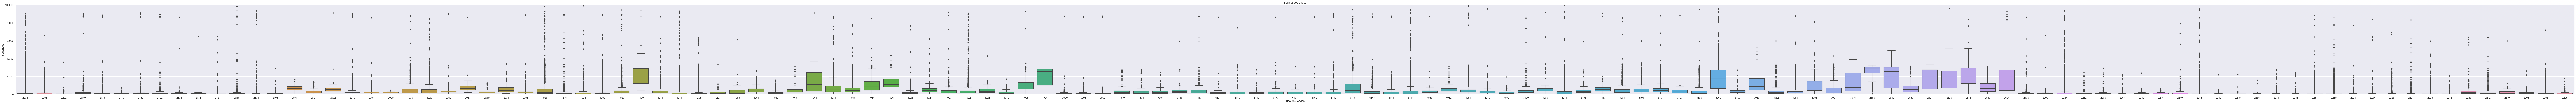

In [26]:
plt.figure(figsize=(200, 7))
plt.title('Boxplot dos dados')
plt.ylim(0,100000)
ax = sns.boxplot(x=df_notnull_filtrado['cd_servico'], y=df_notnull_filtrado['total_segundos'])
ax.set(xlabel='Tipo de Serviço', ylabel='Segundos')
plt.show()

## Apagando outliers pelo método Intervalo interquartil (IQR)

In [27]:
def remove_outliers_por_tipo(df, coluna):
    df_sem_outliers = pd.DataFrame()
    
    for tipo, grupo in df.groupby('cd_servico'):
        Q1 = grupo[coluna].quantile(0.25)
        Q3 = grupo[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        grupo_sem_outliers = grupo[(grupo[coluna] >= limite_inferior) & (grupo[coluna] <= limite_superior)]
        df_sem_outliers = pd.concat([df_sem_outliers, grupo_sem_outliers])

    return df_sem_outliers
    
df_limpo = remove_outliers_por_tipo(df_notnull_filtrado, 'total_segundos')


## Média de cada serviço depois da exclusão de outliers

In [28]:
df_limpo.sort_values(by='cd_servico')

df_media = pd.DataFrame()
df_media = df_limpo.groupby('cd_servico')['total_segundos'].mean().reset_index()
df_media = df_media.rename(columns={'total_segundos': 'tempo medio'})
df_media

,cd_servico,tempo medio
0,10000,773.848331
1,1004,20072.541667
2,1008,9215.215569
3,1019,2033.136213
4,1020,2840.690686
...,...,...
128,7304,2391.366906
129,7305,2203.622120
130,7310,2396.907216
131,9997,658.916844


##### Ao observar o resultado da média de cada serviço, compreendo que há serviços que diminuiram seu tempo médio, uma vez que dados outliers foram retirados. Mas me veio o questionamento, por que o serviço 1004 manteve sua média sem alteração? Observando o boxplot, esse serviço não possuia nenhum outlier, então nenhum dado dele foi retirado. Assim, me veio outro ponto, quantos serviços registrados temos com esse código de serviço?
* Voltando um pouco no pojeto, observo que o serviço 1004 só possui 126 registros e que ainda é muito cedo para definir algo sobre ele. Semelhante a essa amostragem, temos os códigos 1026,1048 entre outros.

* Se o código possuisse uma amostragem grande e ainda assim, possuisse um medida de dispersão grande, seria um bom serviço para rever como ele está sendo executado. Provavelmente teria uma boa margem para melhorar seu processo.

* Códigos que possuem um boxplot muito pequeno mesmo tendo uma amostragem superior a 1000, sugere que as pessoas iniciam e finalizam o serviço no mesmo momento e não representa seu real tempo de execução. Mesmo depois de eliminar serviços inferiores menores que 2 minutos.

* Somente para título de curiosidade, foram retirados dados nulos do estudo, para um estudo mais detalhado, seria necessário que os colaboradores preenchessem os dados com mais detalhes.

* Uma das colunas retiradas, como a coluna "dt_inicio_ocorrencia" não possuia nenhum dado e seria uma ótima coluna para ter um estudo mais aprofundado e detalhado do processo.

##### Como os diretores tinham o objetivo de comparar a execução de um serviço de uma equipe com a outra, me pediram para criar uma forma de não analisar apenas quantitativamente, mas sim qualitativamente a execução de um serviço com outro. Considerando que a equipe que será comparada a outra, só executarão o mesmo tipo de serviço entre eles, sendo uma gama considerável de serviços, preciso atribuir, de alguma forma, peso a eles. Uma vez que, por exemplo, uma equipe pode realizar mais serviços que outra,mas só pegar serviços fáceis para serem executados, então quantitativamente, essa equipe será beneficiada. Para solucionar esse problema, irei somar todas as médias e dividir cada média por essa somatória.Observe:

### Criando uma variável que soma as médias

In [29]:
soma_media = df_media['tempo medio'].sum()
print(soma_media)

505269.29395400255


### Criando uma coluna de peso

In [36]:
df_media['peso'] = df_media['tempo medio']/soma_media
print(df_media)

    cd_servico   tempo medio      peso
0        10000    773.848331  0.001532
1         1004  20072.541667  0.039726
2         1008   9215.215569  0.018238
3         1019   2033.136213  0.004024
4         1020   2840.690686  0.005622
..         ...           ...       ...
128       7304   2391.366906  0.004733
129       7305   2203.622120  0.004361
130       7310   2396.907216  0.004744
131       9997    658.916844  0.001304
132       9998    813.596299  0.001610

[133 rows x 3 columns]


____________________________________________________

In [38]:
df_media.to_excel(destino_final, index=True)
print("Exportação concluída com sucesso!")

Exportação concluída com sucesso!


# Conclusão

&nbsp;&nbsp;&nbsp;No estudo de caso em questão, foi feito um recorte dos dados para um estudo detalhado. Agora que temos um resultado, podemos iniciar com maior vigor , uma comparação com os serviços novos atualizando a lista para verificar se eles estão acima ou abaixo da média. O objetivo é termos um tempo de execução hábil sem perder a qualidade defendida do serviço.<br />
&nbsp;&nbsp;&nbsp;Após realizar a limpeza dos dados, compreende-se que temos muito o que melhorar quanto a inserção de dados, e que por meio dos estudos, verifica-se que há uma perda de  mais de 50% dos dados. O que me mantém mais otimista é o fato de que os dados mais concisos são dados mais recentes e que por meio deles, podemos ter um início mais rápido do estudo de caso.<br />